# Plot Hospital Locations And Covid Metrics
### By Brian Minie (bminie7@gmail.com)

In this notebook, I'll demonstrate how to plot a hospitals location along with the Covid metrics on a map.

In the future, we could envision these steps as part of a pipeline/applicaton where the data is pulled down and refreshed on a regular basis.

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
hospital_coordinates = pd.read_csv("data/hospital_coordinates.csv")
hospital_gdf = gpd.GeoDataFrame(hospital_coordinates, geometry=gpd.points_from_xy(hospital_coordinates.longitude, hospital_coordinates.latitude))
hospital_gdf.dropna(inplace=True)
hospital_gdf

facility_id                        facility_name  \
0         010001      SOUTHEAST HEALTH MEDICAL CENTER   
1         010005             MARSHALL MEDICAL CENTERS   
2         010006         NORTH ALABAMA MEDICAL CENTER   
3         010007             MIZELL MEMORIAL HOSPITAL   
4         010008          CRENSHAW COMMUNITY HOSPITAL   
...          ...                                  ...   
5300      670260         TEXAS HEALTH HOSPITAL FRISCO   
5301      670266            TOWNSEN MEMORIAL HOSPITAL   
5302      670267     THE WOODLANDS SPECIALTY HOSPITAL   
5304      670285          KINGWOOD EMERGENCY HOSPITAL   
5305      670300  METHODIST MIDLOTHIAN MEDICAL CENTER   

                                   full_address  \
0        1108 ROSS CLARK CIRCLE DOTHAN,AL 36301   
1      2505 U S HIGHWAY 431 NORTH BOAZ,AL 35957   
2         1701 VETERANS DRIVE FLORENCE,AL 35630   
3                    702 N MAIN ST OPP,AL 36467   
4          101 HOSPITAL CIRCLE LUVERNE,AL 36049   
...                                         ...   
5300     12400 N DALLAS PARKWAY FRISCO,TX 75033   
5301      1475 FM 1960 BYPASS E HUMBLE,TX 77338   
5302  25440 INTERSTATE 45 NORTH SPRING,TX 77386   
5304       23330 HIGHWAY 59 N KINGWOOD,TX 77339   
5305     1201 E HIGHWAY 287 MIDLOTHIAN,TX 76065   

                                               location  \
0     Southeast Health Medical Center, East Main Str...   
1     Centers for Medicare & Medicaid Services, Wood...   
2     North Alabama Medical Center Heliport, Central...   
3     Babu memorial hospital, Babu memorial hospital...   
4     View Park Community Hospital, Coliseum Street,...   
...                                                 ...   
5300   Heath Court, 75024, Frisco, Texas, United States   
5301  Joyce Townsend Collins Memorial Woodland, Unit...   
5302  Specialty Rehabilitation Hospital, Parish Road...   
5304  Emergency, Jila Hospital, Dhaka-Sylhet Highway...   
5305  Methodist Medical Center, Oak Ridge Turnpike, ...   

                                              point   latitude   longitude  \
0             (31.2162886, -85.36330002670334, 0.0)  31.216289  -85.363300   
1            (39.31812535, -76.76424986214745, 0.0)  39.318125  -76.764250   
2             (34.80512505, -87.6528419313992, 0.0)  34.805125  -87.652842   
3                      (9.3882289, 76.8451317, 0.0)   9.388229   76.845132   
4            (34.0189666, -118.35434482568647, 0.0)  34.018967 -118.354345   
...                                             ...        ...         ...   
5300                    (33.08027, -96.777879, 0.0)  33.080270  -96.777879   
5301  (42.016530599999996, -71.97708256844466, 0.0)  42.016531  -71.977083   
5302                  (30.070387, -90.4985311, 0.0)  30.070387  -90.498531   
5304                   (23.9295446, 90.702965, 0.0)  23.929545   90.702965   
5305                  (36.024797, -84.2445554, 0.0)  36.024797  -84.244555   

      altitude                     geometry  
0          0.0   POINT (-85.36330 31.21629)  
1          0.0   POINT (-76.76425 39.31813)  
2          0.0   POINT (-87.65284 34.80513)  
3          0.0     POINT (76.84513 9.38823)  
4          0.0  POINT (-118.35434 34.01897)  
...        ...                          ...  
5300       0.0   POINT (-96.77788 33.08027)  
5301       0.0   POINT (-71.97708 42.01653)  
5302       0.0   POINT (-90.49853 30.07039)  
5304       0.0    POINT (90.70297 23.92954)  
5305       0.0   POINT (-84.24456 36.02480)  

[4653 rows x 9 columns]

In [3]:
# I'm going to use existing community data as an example, really we should use the API to pull the most recent data
community_data_file = "data/Community_Profile_Report_Counties.geojson"
community_data = gpd.read_file(community_data_file)
community_data = community_data[~community_data.County.str.startswith("Unallocated")]

In [4]:
# Now let's just look at the state of Michigan to demonstrate filtering the data frame
michigan_community = community_data[community_data.State_Abbreviation == "MI"]
michigan_hospitals = hospital_gdf[hospital_gdf.location.str.contains("Michigan,")]
michigan_hospitals.dropna(inplace=True)

C:\Users\bmini\anaconda3\envs\jupyter\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


Text(0.5, 0.98, 'COVID-19 Cases in the Last 7 Days in Michigan By County')

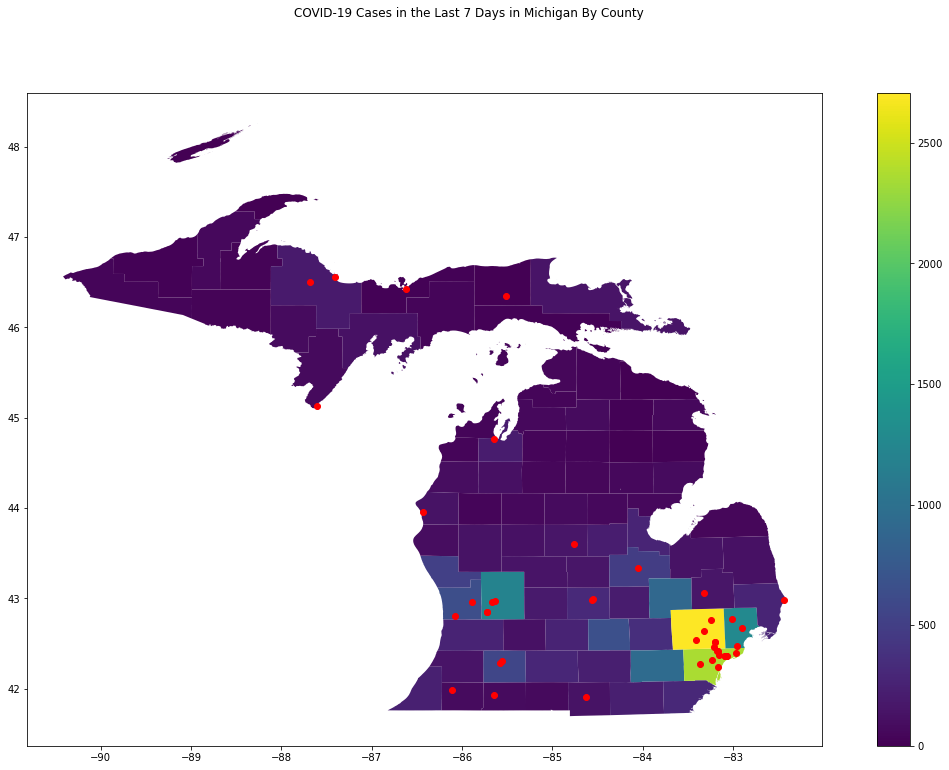

In [5]:
f, ax = plt.subplots(1, figsize=(20, 12))
ax = michigan_community.plot(column="Cases_last_7_days", legend=True, missing_kwds={'color': 'lightgrey'}, ax=ax)
michigan_hospitals.plot(ax=ax, color="red")
f.suptitle("COVID-19 Cases in the Last 7 Days in Michigan By County")

In [6]:
m = michigan_community.explore(column="Cases_last_7_days", legend=True)
michigan_hospitals.explore(m=m, color="red")